El proposito del proyecto es conocer cual de las 2 tarifas (Surf o Ultimate) genera mas ingresos para la toma de decisiones con respecto al presupuesto de publicidad.

Los datos que planeo realizar son los siguientes:
- Explorar los datos de usuarios, llamadas, mensajes, etc.
- Limpiar y preparar los datos.
- Calcular los ingresos mensuales por usuario
- Analizar el comportamiento de los clientes
- Realizar pruebas para saber si se cumplen las hipotesis
- Generar conclusiones que ayuden para la toma de decisiones.

## Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [2]:
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

In [3]:
users.info()
print()
calls.info()
print()
messages.info()
print()
internet.info()
print()
plans.info()

users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = np.ceil(calls['duration']).astype(int)

messages['message_date'] = pd.to_datetime(messages['message_date'])

internet['session_date'] = pd.to_datetime(internet['session_date'])

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 500 entries, 0 to 499
,Data columns (total 8 columns):
, #   Column      Non-Null Count  Dtype 
,---  ------      --------------  ----- 
, 0   user_id     500 non-null    int64 
, 1   first_name  500 non-null    object
, 2   last_name   500 non-null    object
, 3   age         500 non-null    int64 
, 4   city        500 non-null    object
, 5   reg_date    500 non-null    object
, 6   plan        500 non-null    object
, 7   churn_date  34 non-null     object
,dtypes: int64(2), object(6)
,memory usage: 31.4+ KB
,
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 137735 entries, 0 to 137734
,Data columns (total 4 columns):
, #   Column     Non-Null Count   Dtype  
,---  ------     --------------   -----  
, 0   id         137735 non-null  object 
, 1   user_id    137735 non-null  int64  
, 2   call_date  137735 non-null  object 
, 3   duration   137735 non-null  float64
,dtypes: float64(1), int64(1), object(2)
,memory usage: 4.2+ MB


In [4]:
users.info()
print()
calls.info()
print()
messages.info()
print()
internet.info()
print()
plans.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 500 entries, 0 to 499
,Data columns (total 8 columns):
, #   Column      Non-Null Count  Dtype         
,---  ------      --------------  -----         
, 0   user_id     500 non-null    int64         
, 1   first_name  500 non-null    object        
, 2   last_name   500 non-null    object        
, 3   age         500 non-null    int64         
, 4   city        500 non-null    object        
, 5   reg_date    500 non-null    datetime64[ns]
, 6   plan        500 non-null    object        
, 7   churn_date  34 non-null     datetime64[ns]
,dtypes: datetime64[ns](2), int64(2), object(4)
,memory usage: 31.4+ KB
,
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 137735 entries, 0 to 137734
,Data columns (total 4 columns):
, #   Column     Non-Null Count   Dtype         
,---  ------     --------------   -----         
, 0   id         137735 non-null  object        
, 1   user_id    137735 non-null  int64         
, 2   call_date  1377

## Tarifas

In [5]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 2 entries, 0 to 1
,Data columns (total 8 columns):
, #   Column                 Non-Null Count  Dtype  
,---  ------                 --------------  -----  
, 0   messages_included      2 non-null      int64  
, 1   mb_per_month_included  2 non-null      int64  
, 2   minutes_included       2 non-null      int64  
, 3   usd_monthly_pay        2 non-null      int64  
, 4   usd_per_gb             2 non-null      int64  
, 5   usd_per_message        2 non-null      float64
, 6   usd_per_minute         2 non-null      float64
, 7   plan_name              2 non-null      object 
,dtypes: float64(2), int64(5), object(1)
,memory usage: 256.0+ bytes


In [6]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No se observan datos ausentes y el tipo de datos es adecuado para cada columna.
La columna 'mb_per_month_included' esta mostrando en MB pero en 'usd_per_gb' aparece el precio por GB.
Lo que se puede hacer es modificar la columna 'mb_per_month_included' para que aparezcan con datos por GB para que sea la misma unidad de medida.

## Corregir datos

In [7]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Enriquecer los datos

In [8]:
users['reg_month'] = users['reg_date'].dt.month
users['reg_year'] = users['reg_date'].dt.year

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,reg_year
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,2018
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,2018
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,2018
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,2018
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,2018


## Usuarios/as

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 500 entries, 0 to 499
,Data columns (total 10 columns):
, #   Column      Non-Null Count  Dtype         
,---  ------      --------------  -----         
, 0   user_id     500 non-null    int64         
, 1   first_name  500 non-null    object        
, 2   last_name   500 non-null    object        
, 3   age         500 non-null    int64         
, 4   city        500 non-null    object        
, 5   reg_date    500 non-null    datetime64[ns]
, 6   plan        500 non-null    object        
, 7   churn_date  34 non-null     datetime64[ns]
, 8   reg_month   500 non-null    int64         
, 9   reg_year    500 non-null    int64         
,dtypes: datetime64[ns](2), int64(4), object(4)
,memory usage: 39.2+ KB


In [10]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,reg_year
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,2018
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,2018
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,2018
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,2018
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,2018


Se observa en la informacion general que la gran mayoria de las filas en 'churn_date' tienen valores ausentes, lo que indica que la tarifa se estaba usando cuando fue extraida esta base de datos. Y considero que se puede dejar con esos valores ausentes, ya que eso puede ayudarnos mas adelante si se necesita filtrar por clientes que aun tengan el servicio activo.
Ademas, se pueden ver las 2 columnas que se agregaron anteriormente (tanto la del mes como la del año de suscripcion).

### Corregir los datos

In [11]:
# ¿Hay duplicados?
print(users['user_id'].duplicated().sum())

# ¿Rangos de edad razonables?
print(users['age'].describe())

# ¿Fechas de registro consistentes?
users['reg_date'].min(), users['reg_date'].max()

0
,count    500.000000
,mean      45.486000
,std       16.972269
,min       18.000000
,25%       30.000000
,50%       46.000000
,75%       61.000000
,max       75.000000
,Name: age, dtype: float64


(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

### Enriquecer los datos

In [12]:
users['customer_age_days'] = (pd.Timestamp('2018-12-31') - users['reg_date']).dt.days

users['age_group'] = pd.cut(users['age'], 
                           bins=[0, 25, 35, 50, 100], 
                           labels=['Joven', 'Adulto_Joven', 'Adulto', 'Mayor'])

## Llamadas

In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 137735 entries, 0 to 137734
,Data columns (total 4 columns):
, #   Column     Non-Null Count   Dtype         
,---  ------     --------------   -----         
, 0   id         137735 non-null  object        
, 1   user_id    137735 non-null  int64         
, 2   call_date  137735 non-null  datetime64[ns]
, 3   duration   137735 non-null  int64         
,dtypes: datetime64[ns](1), int64(2), object(1)
,memory usage: 4.2+ MB


In [14]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


No existen valores ausentes en ninguna columna de este DataFrame.
Se pueden agregar ciertas columnas, por ejemplo para saber qué día de la semana se realizaron cada una de las llamadas.
Se puede agregar una columna para conocer si fue durante fin de semana o no cada llamada.
Además, puedo extraer el mes y el año en columnas nuevas, para poder agrupar posteriormente en caso de ser necesario.

### Corregir los datos

No se observan datos por corregir de momento.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
calls['call_month'] = calls['call_date'].dt.month
calls['call_year'] = calls['call_date'].dt.year

calls['duration_category'] = pd.cut(calls['duration'], 
                                   bins=[0, 1, 5, 15, float('inf')], 
                                   labels=['Muy corta', 'Corta', 'Media', 'Larga'])

calls['day_of_week'] = calls['call_date'].dt.day_name()
calls['is_weekend'] = calls['call_date'].dt.weekday >= 5

## Internet

In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 104825 entries, 0 to 104824
,Data columns (total 4 columns):
, #   Column        Non-Null Count   Dtype         
,---  ------        --------------   -----         
, 0   id            104825 non-null  object        
, 1   user_id       104825 non-null  int64         
, 2   session_date  104825 non-null  datetime64[ns]
, 3   mb_used       104825 non-null  float64       
,dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
,memory usage: 3.2+ MB


In [17]:
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


El tipo de datos se observa correcto y no se observan valores ausentes en ninguna columna.
Lo que se puede hacer es agregar las columnas que nos indiquen el mes y el año de la sesion web.
Ademas, se debe agregar una columna del uso de MB convertidos a GB, ya que el calculo en otros DataFrame se encuentra en esa unidad de medida.
Por ultimo, se considera de relevancia el poder indicar en cada sesion web si corresponde a un dia entre semana o fin de semana.

### Corregir los datos

No se requiere corregir ningun dato de momento.

### Enriquecer los datos

In [18]:
internet['gb_used'] = internet['mb_used'] / 1024

internet['session_month'] = internet['session_date'].dt.month
internet['session_year'] = internet['session_date'].dt.year

internet['day_of_week'] = internet['session_date'].dt.day_name()
internet['is_weekend'] = internet['session_date'].dt.weekday >= 5

## Estudiar las condiciones de las tarifas

In [19]:
plans.info()
print()
plans.head()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 2 entries, 0 to 1
,Data columns (total 9 columns):
, #   Column                 Non-Null Count  Dtype  
,---  ------                 --------------  -----  
, 0   messages_included      2 non-null      int64  
, 1   mb_per_month_included  2 non-null      int64  
, 2   minutes_included       2 non-null      int64  
, 3   usd_monthly_pay        2 non-null      int64  
, 4   usd_per_gb             2 non-null      int64  
, 5   usd_per_message        2 non-null      float64
, 6   usd_per_minute         2 non-null      float64
, 7   plan_name              2 non-null      object 
, 8   gb_per_month_included  2 non-null      float64
,dtypes: float64(3), int64(5), object(1)
,memory usage: 272.0+ bytes
,


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario


In [20]:
# Calcular número de llamadas por usuario y mes
calls_per_user_month = (
    calls.groupby(['user_id', 'call_year', 'call_month'])
         .size()
         .reset_index(name='calls_count')
)

In [21]:
# Calcular minutos usados por cada usuario al mes
minutes_per_user_month = (
    calls.groupby(['user_id', 'call_year', 'call_month'])['duration']
         .sum()
         .reset_index(name='total_minutes')
)

In [22]:
# Extraer año y mes
messages['message_year'] = messages['message_date'].dt.year
messages['message_month'] = messages['message_date'].dt.month

# Calcular número de mensajes por usuario y mes
messages_per_user_month = (
    messages.groupby(['user_id', 'message_year', 'message_month'])
            .size()
            .reset_index(name='messages_count')
)

In [23]:
# Calcular volumen de tráfico por usuario y mes
internet_per_user_month = (
    internet.groupby(['user_id', 'session_year', 'session_month'])['gb_used']
    .sum()
    .reset_index(name='total_gb_used')
)

Ahora se estandarizarán los nombres de algunas columnas y se fusionarán los dataframes.

In [24]:
# Estandarizar nombres de columnas para facilitar fusion de DataFrames
calls_per_user_month = calls_per_user_month.rename(columns={
    'call_year': 'year',
    'call_month': 'month'
})

minutes_per_user_month = minutes_per_user_month.rename(columns={
    'call_year': 'year', 
    'call_month': 'month'
})

messages_per_user_month = messages_per_user_month.rename(columns={
    'message_year': 'year',
    'message_month': 'month'
})

internet_per_user_month = internet_per_user_month.rename(columns={
    'session_year': 'year',
    'session_month': 'month'
})



# Fusionar llamadas y minutos (ambos vienen del mismo dataset)
user_monthly_data = calls_per_user_month.merge(
    minutes_per_user_month,
    on=['user_id', 'year', 'month'],
    how='outer'
)

# Agregar datos de mensajes
user_monthly_data = user_monthly_data.merge(
    messages_per_user_month,
    on=['user_id', 'year', 'month'],
    how='outer'
)

# Agregar datos de Internet
user_monthly_data = user_monthly_data.merge(
    internet_per_user_month,
    on=['user_id', 'year', 'month'],
    how='outer'
)

In [25]:
# Añadir información del plan de cada usuario
user_monthly_data = user_monthly_data.merge(
    users[['user_id', 'plan']], 
    on='user_id', 
    how='left'
)

# Fusionar con información detallada de los planes
user_monthly_data = user_monthly_data.merge(
    plans, 
    left_on='plan', 
    right_on='plan_name', 
    how='left'
)

In [26]:
# Rellenar valores faltantes con 0
user_monthly_data = user_monthly_data.fillna({
    'calls_count': 0,
    'total_minutes': 0,
    'messages_count': 0,
    'total_gb_used': 0
})

# Calcular excesos (solo valores positivos)
user_monthly_data['excess_minutes'] = np.maximum(
    user_monthly_data['total_minutes'] - user_monthly_data['minutes_included'], 
    0
)

user_monthly_data['excess_messages'] = np.maximum(
    user_monthly_data['messages_count'] - user_monthly_data['messages_included'], 
    0
)

# Exceso de datos redondeado hacia arriba
raw_excess_gb = np.maximum(
    user_monthly_data['total_gb_used'] - user_monthly_data['gb_per_month_included'], 
    0
)
user_monthly_data['excess_gb'] = np.ceil(raw_excess_gb)

# Calcular el ingreso mensual total para cada usuario
user_monthly_data['monthly_revenue'] = (
    user_monthly_data['usd_monthly_pay'] +  # Tarifa fija mensual
    (user_monthly_data['excess_minutes'] * user_monthly_data['usd_per_minute']) +  # Exceso minutos
    (user_monthly_data['excess_messages'] * user_monthly_data['usd_per_message']) +  # Exceso mensajes
    (user_monthly_data['excess_gb'] * user_monthly_data['usd_per_gb'])  # Exceso datos redondeado
)


# Redondear ingresos a 2 decimales para presentación profesional
user_monthly_data['monthly_revenue'] = user_monthly_data['monthly_revenue'].round(2)

# Verificar el resultado
print("Primeras 5 filas con ingresos redondeados:")
print(user_monthly_data[['user_id', 'year', 'month', 'plan', 'monthly_revenue']].head())

print("\nIngresos promedio por plan (redondeados):")
print(user_monthly_data.groupby('plan')['monthly_revenue'].agg(['mean', 'min', 'max']).round(2))


Primeras 5 filas con ingresos redondeados:
,   user_id  year  month      plan  monthly_revenue
,0     1000  2018     12  ultimate            70.00
,1     1001  2018      8      surf            20.00
,2     1001  2018      9      surf            20.00
,3     1001  2018     10      surf            90.09
,4     1001  2018     11      surf            60.00
,
,Ingresos promedio por plan (redondeados):
,           mean   min     max
,plan                         
,surf      60.71  20.0  590.37
,ultimate  72.31  70.0  182.00


## Estudia el comportamiento de usuario

### Llamadas

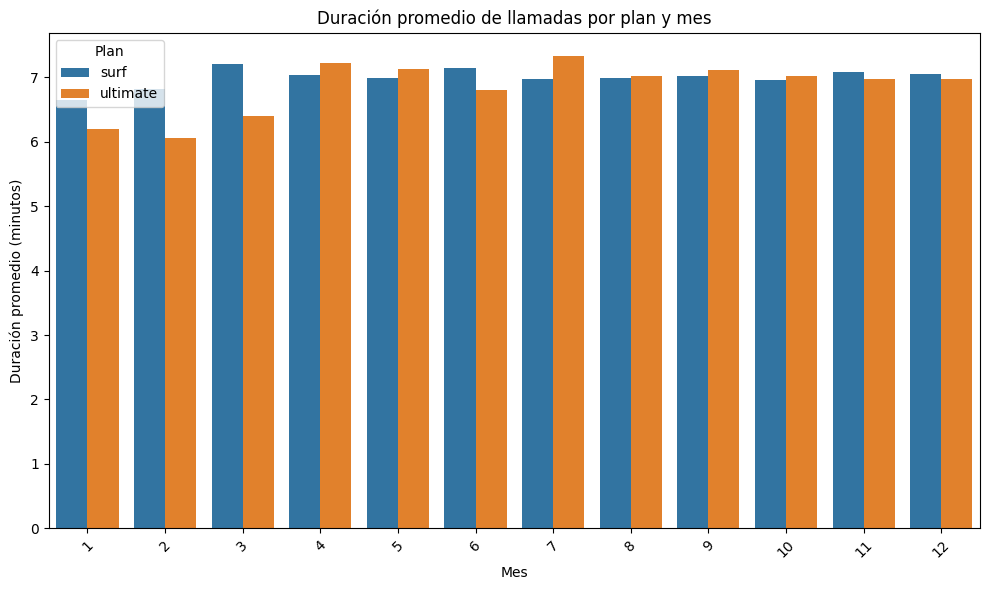

In [27]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Evitar división por cero
user_monthly_data['avg_call_duration'] = np.where(
    user_monthly_data['calls_count'] > 0,
    user_monthly_data['total_minutes'] / user_monthly_data['calls_count'],
    0
)

# Agrupar por plan y mes para calcular promedio de duración
avg_duration_by_plan_month = user_monthly_data.groupby(['plan', 'month'])['avg_call_duration'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_duration_by_plan_month, x='month', y='avg_call_duration', hue='plan')
plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (minutos)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

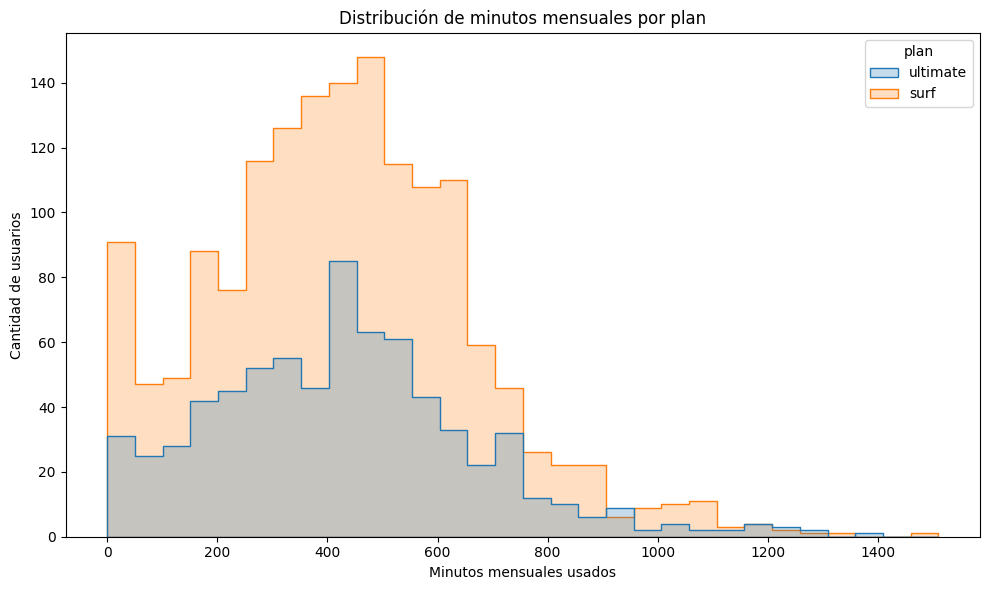

In [28]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=user_monthly_data, x='total_minutes', hue='plan', 
             element='step', stat='count', bins=30)  # Cambié multiple por element
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos mensuales usados')
plt.ylabel('Cantidad de usuarios')
plt.tight_layout()
plt.show()

In [29]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Calcular duración promedio por llamada, evitando división por cero
user_monthly_data['avg_call_duration'] = np.where(
    user_monthly_data['calls_count'] > 0,
    user_monthly_data['total_minutes'] / user_monthly_data['calls_count'],
    0
)

# Agrupar por plan y calcular media y varianza
call_stats = user_monthly_data.groupby('plan')['avg_call_duration'].agg(['mean', 'var']).reset_index()

# Renombrar columnas para claridad
call_stats.columns = ['plan', 'mean_call_duration', 'var_call_duration']

# Mostrar tabla
call_stats

,plan,mean_call_duration,var_call_duration
0,surf,7.030712,2.102064
1,ultimate,7.009738,1.389638


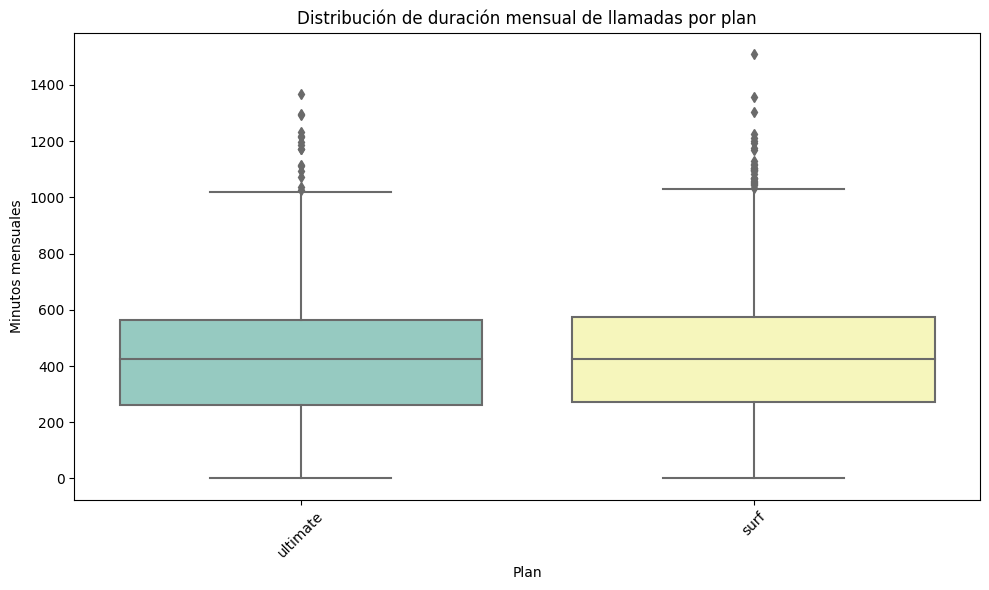

In [30]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=user_monthly_data, x='plan', y='total_minutes', palette='Set3')
plt.title('Distribución de duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos mensuales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El comportamiento en ambos planes es muy similar de acuerdo a este grafico.
Se observa que el plan "Surf" tiene mayor cantidad de clientes con un comportamiento atipico con respecto a "Ultimate".

### Mensajes

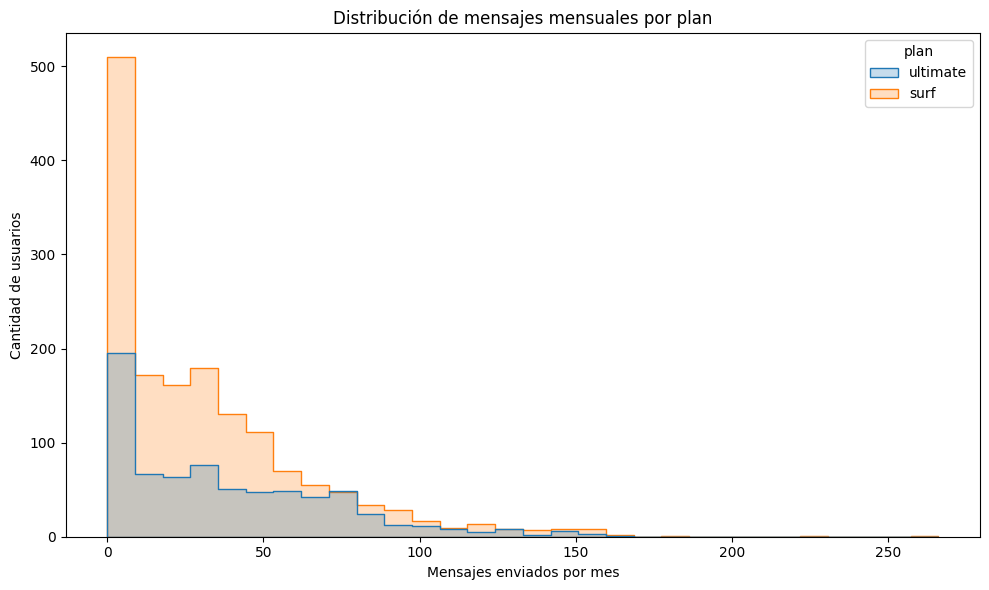

In [31]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=user_monthly_data, x='messages_count', hue='plan', 
             element='step', stat='count', bins=30)  # Cambiar multiple por element
plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Mensajes enviados por mes')
plt.ylabel('Cantidad de usuarios')
plt.tight_layout()
plt.show()

In [32]:
# Calcular media y varianza
message_stats = user_monthly_data.groupby('plan')['messages_count'].agg(['mean', 'var']).reset_index()

# Renombrar columnas
message_stats.columns = ['plan', 'mean_messages_count', 'var_messages_count']

# Redondear a 2 decimales
message_stats = message_stats.round(2)

# Mostrar tabla
print("Estadísticas de mensajes por plan:")
print(message_stats)

Estadísticas de mensajes por plan:
,       plan  mean_messages_count  var_messages_count
,0      surf                31.16             1126.72
,1  ultimate                37.55             1208.76


Se observa que los usuario de 'ultimate' envian aprox 6 mensajes más que el promedio de los usuario de 'surf' y que la varianza es bastante elevada en ambas tarifas, lo que significa que muchos usuario están enviando muy pocos mensajes o demasiados (ambos casos muy alejados del promedio)

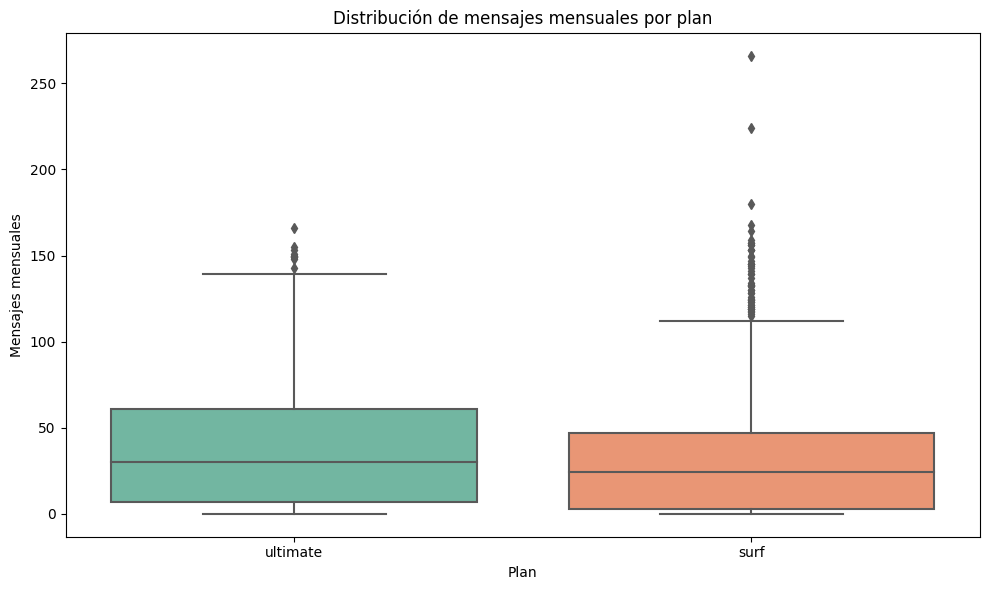

In [33]:
# Traza un diagrama de caja para visualizar la distribución de mensajes mensuales
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_monthly_data, x='plan', y='messages_count', palette='Set2')
plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes mensuales')
plt.tight_layout()
plt.show()

Se puede observar que la media de 'ultimate' es un poco mayor que la de 'surf', lo que indica que los usuario de 'ultimate' tienden a enviar mas mensajes.
La caja de 'ultimate' es claramente mas grande, lo que significa mayor dispersion en el uso de mensajes.
Esto puede indicar que 'ultimate' tiene una mayor diversidad de clientes en cuanto al uso de mensajes (unos envian pocos y otros envian muchos).
Se observa que ningun cliente en la tarifa 'ultimate' excedió el limite de mensajes que tiene (1000), pero muchos de los clientes en 'surf' sí excedieron esos 50 mensajes de limite que tienen.
Se observan muchos más usuarios outliers en la tarifa 'surf' comparado con 'ultimate'.

In [34]:
# Crear columna booleana de excedente
user_monthly_data['exceeds_messages'] = user_monthly_data.apply(
    lambda row: row['messages_count'] > row['messages_included']
    if pd.notnull(row['messages_count']) and pd.notnull(row['messages_included']) else False,
    axis=1
)

# Calcular porcentaje por plan
exceed_stats = user_monthly_data.groupby('plan')['exceeds_messages'].mean().reset_index()
exceed_stats['percentage_exceeding'] = (exceed_stats['exceeds_messages'] * 100).round(2)

# Mostrar tabla
print("Porcentaje de usuarios que exceden sus mensajes incluidos por plan:")
print(exceed_stats[['plan', 'percentage_exceeding']])
print()

# Filtrar usuarios del plan Surf que excedieron sus mensajes
surf_exceeders = user_monthly_data[
    (user_monthly_data['plan'] == 'surf') &
    (user_monthly_data['messages_count'] > user_monthly_data['messages_included'])
].copy()

# Calcular mensajes excedentes
surf_exceeders['excess_messages'] = surf_exceeders['messages_count'] - surf_exceeders['messages_included']

# Calcular ingreso por excedente
surf_exceeders['excess_revenue'] = surf_exceeders['excess_messages'] * 0.03

# Sumar ingresos totales
total_excess_revenue = surf_exceeders['excess_revenue'].sum().round(2)

print(f"Ingreso total por mensajes excedentes en el plan Surf: ${total_excess_revenue} USD")


Porcentaje de usuarios que exceden sus mensajes incluidos por plan:
,       plan  percentage_exceeding
,0      surf                 21.61
,1  ultimate                  0.00
,
,Ingreso total por mensajes excedentes en el plan Surf: $330.93 USD


### Internet

In [35]:
# Calcular media y varianza por plan
gb_stats = user_monthly_data.groupby('plan')['total_gb_used'].agg(['mean', 'var']).reset_index()

# Renombrar columnas
gb_stats.columns = ['plan', 'mean_gb_used', 'var_gb_used']

# Redondear a 2 decimales
gb_stats = gb_stats.round(2)

# Mostrar tabla
print("Media y varianza del consumo mensual de GB por plan:")
print(gb_stats)

Media y varianza del consumo mensual de GB por plan:
,       plan  mean_gb_used  var_gb_used
,0      surf         16.17        61.24
,1  ultimate         16.81        58.80


Los promedios de consumo mensual de GB entre Surf y Ultimate son muy similares, lo que sugiere que el comportamiento típico de los usuarios en cuanto a datos es casi igual, independientemente del plan.

La varianza ligeramente mayor en Surf (61.24 vs 58.80) indica que hay más dispersión en ese grupo, lo que puede reflejar una asimetría o presencia de usuarios extremos que consumen mucho más o mucho menos que el promedio.

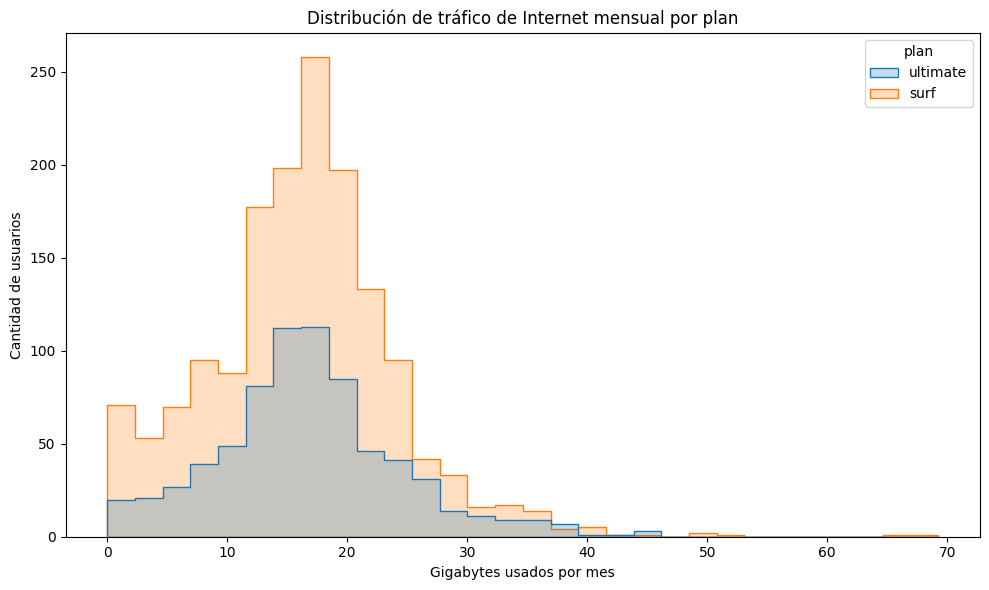

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=user_monthly_data, x='total_gb_used', hue='plan',
             element='step', stat='count', bins=30)
plt.title('Distribución de tráfico de Internet mensual por plan')
plt.xlabel('Gigabytes usados por mes')
plt.ylabel('Cantidad de usuarios')
plt.tight_layout()
plt.show()


In [37]:
# Filtrar usuarios Surf que consumen más de 15 GB
surf_over_15gb = user_monthly_data[
    (user_monthly_data['plan'] == 'surf') & 
    (user_monthly_data['total_gb_used'] > 15)
]

# Contamos usuarios únicos
usuarios_surf_over_15gb = surf_over_15gb['user_id'].nunique()
print(f"Usuarios de Surf que consumen más de 15 GB: {usuarios_surf_over_15gb}")

# 6+ meses del año
usuarios_regulares = surf_over_15gb.groupby('user_id').size()
usuarios_regulares_6_meses = (usuarios_regulares >= 6).sum()
print(f"Usuarios que lo hacen regularmente (6+ meses): {usuarios_regulares_6_meses}")

Usuarios de Surf que consumen más de 15 GB: 261
,Usuarios que lo hacen regularmente (6+ meses): 54



1. **Diferencias entre planes**: Se puede observar que el consumo de GB por cada tarifa es similar, pero la cantidad de usuarios es significativamente mayor en el plan 'surf'.

2. **Implicaciones**: El plan 'surf' tiene significativamente mas usuarios que 'ultimate', lo que sugiere que los clientes se sienten mas atraidos por el plan mas economico. Al mismo tiempo, se detecta que el consumo es tan similar en cuanto a GB que podemos deducir que los usuario no necesariamente consumen mas datos solo por tener un plan mas caro. Lo que debemos recordar es que el plan 'surf' incluye unicamente 15 GB de datos, por lo que sabemos que los que gastaron 16 o mas, fueron pagados como excedente, mientras que el 'ultimate' incluye 30 GB, lo que indica que una significativa cantidad de clientes de 'surf' pagaron excedente, mientra que una cantidad mucho menor de clientes de 'ultimate' pagó el mismo excedente (aunque con una cuota por GB 30% menor con respecto a 'ultimate')


## Ingreso

In [38]:
# Estadísticas descriptivas de ingresos por plan
revenue_stats = user_monthly_data.groupby('plan')['monthly_revenue'].describe()
print("Estadísticas descriptivas de ingresos mensuales por plan:")
print(revenue_stats.round(2))

Estadísticas descriptivas de ingresos mensuales por plan:
,           count   mean    std   min   25%    50%    75%     max
,plan                                                            
,surf      1573.0  60.71  55.39  20.0  20.0  40.36  80.36  590.37
,ultimate   720.0  72.31  11.40  70.0  70.0  70.00  70.00  182.00


In [39]:
# Agrupar por plan
plan_summary = user_monthly_data.groupby('plan').agg(
    users=('user_id', 'nunique'),
    total_revenue=('monthly_revenue', 'sum'),
    avg_revenue=('monthly_revenue', 'mean')
).reset_index()

# Redondear valores
plan_summary[['total_revenue', 'avg_revenue']] = plan_summary[['total_revenue', 'avg_revenue']].round(2)

# Calcular diferencia de promedio entre planes
if len(plan_summary) == 2:
    diff = abs(plan_summary.loc[0, 'avg_revenue'] - plan_summary.loc[1, 'avg_revenue'])
    print(f"Diferencia promedio de ingresos entre planes: ${diff:.2f} USD")

# Mostrar tabla resumen
print("Resumen por plan:")
print(plan_summary)


Diferencia promedio de ingresos entre planes: $11.60 USD
,Resumen por plan:
,       plan  users  total_revenue  avg_revenue
,0      surf    333       95491.18        60.71
,1  ultimate    157       52066.00        72.31


El ingreso promedio por cada plan no tiene gran diferencia (tomando en cuenta que originalmente el plan surf cuesta 20 y el ultimate 70), por lo que se observa que en la tarifa surf existen muchos usuarios que sobrepasan los limites de mensajes, GB y/o llamadas por lo que deben pagar demasiado excedente(por eso se observa un promedio de mas de un 200% 'extra' de la tarifa original). Y por parte del ultimate, el gasto promedio es solo 2.31 por encima del precio original, lo que representa menos de un 7% por encima de la tarifa.
Esto puede indicar que el comportamiento de los ingresos de ultimate son mas predecibles que los de surf.
Esto, a su vez, puede hacernos llegar a pensar en que posiblemente los limites de SMS, minutos y GB son demasiado bajos. O posiblemente pueda ayudarnos a tomar la decisión de ofrecer a algunos clientes de surf que puedan migrar a la tarifa ultimate para que sus limites de consumo sean mucho mayores y no tengan que estarse preocupando por sus gastos extras.
Todo depende de, por ejemplo, si existen muchas quejas por parte de los usuarios acerca de los cobros por consumo extra de minutos, SMS o GB (dicho dato no lo tenemos en estas bases). Todo depende del enfoque que se le quiera dar a la estrategia.
Se observa ademas que suft cuenta con mas del doble de usuarios, pero que no cuenta ni siquiera con el doble de ingresos que ultimate


## Prueba las hipótesis estadísticas


H₀ = No existe diferencia entre los ingresos promedio de los usuarios del plan Surf y Ultimate

H₁: Los ingresos promedio de los usuarios del plan Surf son diferentes a los ingresos promedio de los usuarios del plan Ultimate


In [40]:
# Prueba las hipótesis

# Filtrar ingresos de usuarios del plan Surf
ingresos_surf = user_monthly_data[user_monthly_data['plan'] == 'surf']['monthly_revenue'].dropna()

# Filtrar ingresos de usuarios del plan Ultimate
ingresos_ultimate = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['monthly_revenue'].dropna()

from scipy import stats as st

# Prueba t para muestras independientes
results = st.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)
alpha = 0.05

if results.pvalue < alpha:
    print("Rechazamos H₀: Hay diferencia significativa")
else:
    print("No rechazamos H₀: No hay evidencia de diferencia")



Rechazamos H₀: Hay diferencia significativa



H₀: No existe diferencia entre los ingresos promedio de usuarios de NY-NJ y otras regiones.

H₁: Los ingresos promedio son diferentes entre NY-NJ y otras regiones.


In [41]:
# Prueba las hipótesis

# Unir user_monthly_data con users usando user_id
merged_data = user_monthly_data.merge(users[['user_id', 'city']], on='user_id', how='left')

# Grupo NY-NJ
ny_nj_mask = merged_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'
ingresos_ny_nj = merged_data[ny_nj_mask]['monthly_revenue'].dropna()

# Grupo otras regiones
ingresos_otros = merged_data[~ny_nj_mask]['monthly_revenue'].dropna()

from scipy import stats as st

# Prueba t para muestras independientes (Welch)
results = st.ttest_ind(ingresos_ny_nj, ingresos_otros, equal_var=False)
alpha = 0.05

# Mostrar resultados
print(f"Estadístico t: {results.statistic:.4f}")
print(f"Valor p: {results.pvalue:.4f}")

if results.pvalue < alpha:
    print("Rechazamos H₀: Hay diferencia significativa en los ingresos promedio.")
else:
    print("No rechazamos H₀: No hay evidencia suficiente de diferencia.")

Estadístico t: -2.1309
,Valor p: 0.0335
,Rechazamos H₀: Hay diferencia significativa en los ingresos promedio.


In [42]:
# Análisis exploratorio
print("=== ANÁLISIS EXPLORATORIO ===")
print(f"Tamaño de muestra NY-NJ: {len(ingresos_ny_nj)}")
print(f"Tamaño de muestra otras regiones: {len(ingresos_otros)}")
print()
print(f"Media ingresos NY-NJ: ${ingresos_ny_nj.mean():.2f}")
print(f"Media ingresos otras regiones: ${ingresos_otros.mean():.2f}")
print()
print(f"Desviación estándar NY-NJ: ${ingresos_ny_nj.std():.2f}")
print(f"Desviación estándar otras regiones: ${ingresos_otros.std():.2f}")

=== ANÁLISIS EXPLORATORIO ===
,Tamaño de muestra NY-NJ: 377
,Tamaño de muestra otras regiones: 1916
,
,Media ingresos NY-NJ: $59.92
,Media ingresos otras regiones: $65.22
,
,Desviación estándar NY-NJ: $43.54
,Desviación estándar otras regiones: $47.17


## Conclusión general

In [43]:
# Calcular porcentajes de usuarios que se excedieron en Surf
surf_data = user_monthly_data[user_monthly_data['plan'] == 'surf']

# Porcentaje que excedió minutos
surf_exceed_minutes = (surf_data['total_minutes'] > 500).mean() * 100

# Porcentaje que excedió SMS  
surf_exceed_sms = (surf_data['messages_count'] > 50).mean() * 100

# Porcentaje que excedió GB
surf_exceed_gb = (surf_data['total_gb_used'] > 15).mean() * 100

print(f"Plan Surf - Usuarios que excedieron límites:")
print(f"Minutos (>500): {surf_exceed_minutes:.1f}%")
print(f"SMS (>50): {surf_exceed_sms:.1f}%") 
print(f"GB (>15): {surf_exceed_gb:.1f}%")

Plan Surf - Usuarios que excedieron límites:
,Minutos (>500): 36.0%
,SMS (>50): 21.6%
,GB (>15): 57.9%


In [44]:
# Calcular porcentajes para Ultimate
ultimate_data = user_monthly_data[user_monthly_data['plan'] == 'ultimate']

# Porcentajes que excedieron límites
ultimate_exceed_minutes = (ultimate_data['total_minutes'] > 3000).mean() * 100
ultimate_exceed_sms = (ultimate_data['messages_count'] > 1000).mean() * 100  
ultimate_exceed_gb = (ultimate_data['total_gb_used'] > 30).mean() * 100

print(f"Plan Ultimate - Usuarios que excedieron límites:")
print(f"Minutos (>3000): {ultimate_exceed_minutes:.1f}%")
print(f"SMS (>1000): {ultimate_exceed_sms:.1f}%")
print(f"GB (>30): {ultimate_exceed_gb:.1f}%")

Plan Ultimate - Usuarios que excedieron límites:
,Minutos (>3000): 0.0%
,SMS (>1000): 0.0%
,GB (>30): 5.7%


## Conclusión general

El objetivo de este análisis fue determinar cuál de las dos tarifas de Megaline (Surf y Ultimate) genera más ingresos para optimizar el presupuesto de publicidad.

En la tarifa surf existen muchos usuarios que sobrepasan los limites de mensajes, GB y/o llamadas por lo que deben pagar demasiado excedente(por eso se observa un promedio de mas de un 200% 'extra' de la tarifa original). Y por parte del ultimate, el gasto promedio es solo $2.31 por encima del precio original, lo que representa menos de un 7% por encima de la tarifa.

Se observa que la media de ingresos en la region de NY-NJ es de ~9% menor que la media de ingresos en otras regiones. Otras regiones generan más ingreso promedio, lo que podría deberse a:
- Mayor uso de excedentes.
- Preferencia por planes más caros.
- Diferencias en hábitos de consumo.

Podemos ver ademas que gran porcentaje de los usuarios del paquete surf excedieron sus limites de minutos (36%), SMS (21%) y GB (57%), mientras que solo unos pocos usuarios de ultimate se excedieron unicamente en sus GB (5%). Esto genera mayores ingresos para la compañia con respecto a lo que se esperaba ingresar por parte de los consumidores del paquete surf. Esto indica que el paquete ultimate es mas predecible en terminos de ingresos que el surf.

Por ser menos predictible, surf se convierte en una buena opción en cuanto a ingresos en caso de que los clientes superen por mucho el limite de consumo que incluye su paquete. Pero lo que no podemos conocer para el futuro, es si los clientes decidirán controlarse y disminuir sus llamadas, SMS y GB para no excederse. Como se comentó antes, actualmente el ingreso promedio de un usuario de surf es de $60, siendo un 200% adicional el costo de su tarifa, lo que representa un excelente ingreso "inesperado" para la empresa. Pero no se puede contar con ese ingreso adicional por siempre. Considero que para hacer más predecible el ingreso, se debe motivar a los clientes de surf que tienen habitos de consumo mayores a los limites del paquete, a que contraten el paquete ultimate.